In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import string
import nltk
from nltk.corpus import stopwords
import json
import glob
import re
from nltk.stem import WordNetLemmatizer
import numpy as np
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/deanchen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/deanchen/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/deanchen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/deanchen/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [8]:
import os

# Replace 'folder_name' with the name of your folder
#folder_name = 'new_text'

# Construct the file path to the folder
folder_path = os.path.join('new_text')

# List of file names you want to direct to the folder
file_names = ['Abraham_Father_of_Nations.txt',
'Adam_and_Eve.txt',
'Aspen_Barricades_of_Culture_Wars.txt',
'Aubrey_Marcus_Truth_Responsibility.txt',
'Ben_Shapiro.txt',
'Cain_and_Abel.txt',
'Call_to_Abraham.txt',
'Chaos_Order.txt',
'DR_Iain_McGilchrist.txt',
'Death_Resurrection.txt',
'Douglas_Murray_IQ_Politics_and_the_Left.txt',
'God_and_Hierarchy.txt',
'Great_Sacrifice_Abraham_Isaac.txt',
'Jocab_Wresting_with_God.txt',
'Jocabs_Ladder.txt',
'Joseph_Coat_of_Many_Colors.txt',
'Lewis_Howes_Pain_Suffering.txt',
'Lewis_Howes_Responsibility_Meaning.txt',
'Noah_and_the_Flood.txt',
'Oxford_Union_Address.txt',
'Phenomenology_of_the_Divine.txt',
'Psychology_of_the_Flood.txt',
'Russell_Brand_Freedom_Tyranny.txt',
'Sodom_Gomorrah.txt',
'The_Idea_of_God.txt',
'ideology_logos_belief.txt']

# Construct full file paths for each file
file_paths_inside_folder = [os.path.join(folder_path, file_name) for file_name in file_names]

texts =[]
for file_path in file_paths_inside_folder:
    with open(file_path, 'r') as file:
        texts.append(file.read())

In [10]:
texts[13]

'\nThe last time I was here—many of you were here, as well—we got halfway through the story of Jacob. I’ve been digging underneath the story sporadically, since then, to try to find out what other themes are being developed. I’ve got some things that I think are really interesting to talk about. So we’ll get right into it.\nI’m going to review a little bit, first. We were talking about Jacob. I’ll re-update his biography a little bit, so that we can place ourselves in the proper context, before we go on. So his mother, Rebecca, gave birth to twins. The twins, even in her womb, were struggling. Of course, the story is that they were struggling for dominance—the younger against the older, really. Jacob means ‘usurper.’ Rebecca had a vision from God that said that Jacob would supplant Esau. And so, even before her twins were born, they were in a state of competition. \n\nThat’s a recapitulation of the motif of the hostile brothers. It’s a very, very, very common mythological motif. We alr

In [11]:
def divide_paragraphs(input_text, sentences_threshold=10):
    # Tokenize the input text into paragraphs
    paragraphs = input_text.split("\n")

    # Initialize variables
    current_document = ""
    document_count = 1
    paragraph_list = []

    for paragraph in paragraphs:
        current_document += paragraph + "\n"
        num_sentences = len(nltk.sent_tokenize(current_document))
        if num_sentences >= sentences_threshold:
            #save_to_file(current_document, document_count)
            #print(document_count,':',current_document)
            paragraph_list.append(current_document)
            document_count += 1
            current_document = ""

    return paragraph_list

In [16]:
# Divide into smaller documents with at least 10 sentences each
all_smaller_documents = []
for text in texts:
    smaller_documents = divide_paragraphs(text)
    all_smaller_documents.extend(smaller_documents)
print(len(all_smaller_documents))

1638


In [19]:
import random
print(random.sample(all_smaller_documents,10))


['So I thought I would start the lecture tonight by reading a little bit of it. It’s from a chapter on the issue of sacrifice as such. This is Abraham and Isaac. This is a very strange, little Old Testament story. This is one of the stories that’s contained in the Old Testament that makes modern people think that maybe we should just not have that much to do with the Old Testament, per say, at all, especially with regards—and maybe we shouldn’t have anything to do with the God of the Old Testament, either. I mean, as far as Abraham is concerned, God tells him to sacrifice his own son. Now it turns out that God was just kidding, so to speak. I’m obviously being flippant, but it does raise the question, what do you make of the divine being who would require such a thing? Or, conversely, what do you make of Abraham, who would have such delusions? Either way, it’s a little hard on the modern believability, and on the moral integrity of the Old Testament. These are very, very strange storie

In [20]:
def remove_contractions(input_string):
    # Define a dictionary of common contractions and their replacements
    contractions = {
        r"\bain't\b": "am not",
        r"\baren't\b": "are not",
        r"\bcan't\b": "cannot",
        r"\bcouldn't\b": "could not",
        r"\bdidn't\b": "did not",
        r"\bdoesn't\b": "does not",
        r"\bdon't\b": "do not",
        r"\bhadn't\b": "had not",
        r"\bhasn't\b": "has not",
        r"\bhaven't\b": "have not",
        r"\bhe'd\b": "he would",
        r"\bhe'll\b": "he will",
        r"\bhe's\b": "he is",
        r"\bthat's\b": "that is",
        r"\bi'd\b": "i would",
        r"\bi'll\b": "i will",
        r"\bi've\b": "i have",
        r"\bi'm\b": "i am",
        r"\bisn't\b": "is not",
        r"\bit's\b": "it is",
        r"\bshouldn't\b": "should not",
        r"\bwouldn't\b": "would not",
        r"\bwe'd\b": "we would",
        r"\bwe'll\b": "we will",
        r"\bwe're\b": "we are",
        r"\bwe've\b": "we have",
        r"\byou'd\b": "you would",
        r"\byou'll\b": "you will",
        r"\byou're\b": "you are",
        r"\byou've\b": "you have",
    }
    
    # Replace the contractions with their expansions
    for pattern, replacement in contractions.items():
        input_string = re.sub(pattern, replacement, input_string, flags=re.IGNORECASE)

    return input_string

def preprocess_text(text):

    # Convert to lowercase
    text = text.lower()

    text = text.replace("’","'")
    text  = text.replace("—", " ")
    # Remove contractions
    text = remove_contractions(text)

    # Remove punctuation
    text = "".join(char for char in text if char not in string.punctuation)

    # Tokenize the text into words
    words = text.split()

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]


    # Perform POS tagging
    tagged_words = nltk.pos_tag(words)
 

    # Lemmatize the words based on POS tags
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in tagged_words]

    # Join the processed words back into a single string
    processed_text = " ".join(words)

    return processed_text


def get_wordnet_pos(tag):
    """Map POS tag to WordNet POS tag"""
    if tag.startswith('J'):
        return 'a'  # Adjective
    elif tag.startswith('V'):
        return 'v'  # Verb
    elif tag.startswith('N'):
        return 'n'  # Noun
    elif tag.startswith('R'):
        return 'r'  # Adverb
    else:
        return 'n'  # Default to noun


In [21]:
new_doc_list = [preprocess_text(doc) for doc in all_smaller_documents]
print(random.sample(new_doc_list,5))

['sure ok first would know right partly scepticism justified responsible say base willingness take responsibility judgment would willing despite fact could wrong say reasonable situation would err side address person manner request addressed issue issue compel law like compel law end game far concerned excuse compel law', 'horus god vision falcon falcon great vision fly everything see everything egyptian creator god horus tell story horus point well heres picture demonstrate describe emergence metahero hero theres person admire theres set people admire there metaset admirable people extraction ideal far tell whats portray image great one sophisticated image two side christ face symmetrical one god one man icon mean fully develop person one old representation sort know idea there human person ordinariness let say there kinship divine associate willing adoption responsibility mortal produce union manifest book speech associate son proper way perfect example think emergence archetype mult

In [22]:
def save_list_to_file(file_path, string_list):
    with open(file_path, 'w') as file:
        for string in string_list:
            file.write(string + '\n')
save_list_to_file ('cleaned_doc_list_final.txt', new_doc_list)

In [53]:
vectorizer = TfidfVectorizer(   
    lowercase = True,
    max_df= .8,
    min_df= 5,
    ngram_range= (1,3),
    max_features= 300
)
vectors = vectorizer.fit_transform(new_doc_list)
feature_names = vectorizer.get_feature_names_out()
print(feature_names)


['able' 'abraham' 'absolutely' 'across' 'act' 'actually' 'adam' 'aim'
 'along' 'already' 'also' 'although' 'always' 'animal' 'another' 'answer'
 'anything' 'anyways' 'around' 'ask' 'associate' 'away' 'back' 'bad'
 'become' 'begin' 'being' 'believe' 'best' 'big' 'bit' 'bloody' 'body'
 'book' 'bring' 'brother' 'build' 'cain' 'call' 'cannot' 'care' 'case'
 'catastrophe' 'certainly' 'chaos' 'child' 'christ' 'come' 'consciousness'
 'consequence' 'could' 'course' 'culture' 'damn' 'day' 'deal' 'death'
 'degree' 'develop' 'die' 'difference' 'different' 'difficult' 'do'
 'dream' 'earth' 'easy' 'eat' 'element' 'else' 'end' 'enough' 'especially'
 'even' 'ever' 'every' 'everyone' 'everything' 'evil' 'exactly' 'example'
 'exist' 'experience' 'eye' 'face' 'fact' 'fall' 'family' 'far' 'father'
 'figure' 'find' 'first' 'form' 'forward' 'fundamental' 'future' 'game'
 'get' 'give' 'go' 'god' 'good' 'great' 'guy' 'hand' 'happen' 'happy'
 'hard' 'hell' 'here' 'hierarchy' 'high' 'house' 'human' 'human bein

In [54]:
true_k = 20
model = KMeans(n_clusters = true_k, init = 'k-means++', max_iter = 100, n_init=1, random_state = 1)
model.fit(vectors)

order_centroids = model.cluster_centers_.argsort()[:, ::-1] 
terms = vectorizer.get_feature_names_out()

with open (f'final_sample_topic_result_{true_k}.txt', 'w', encoding = 'utf-8') as f:
    for i in range(true_k):
        f.write(f"\nCluster {i}: ")
        for ind in order_centroids[i, :10]:
            f.write(f'{terms[ind]} ')

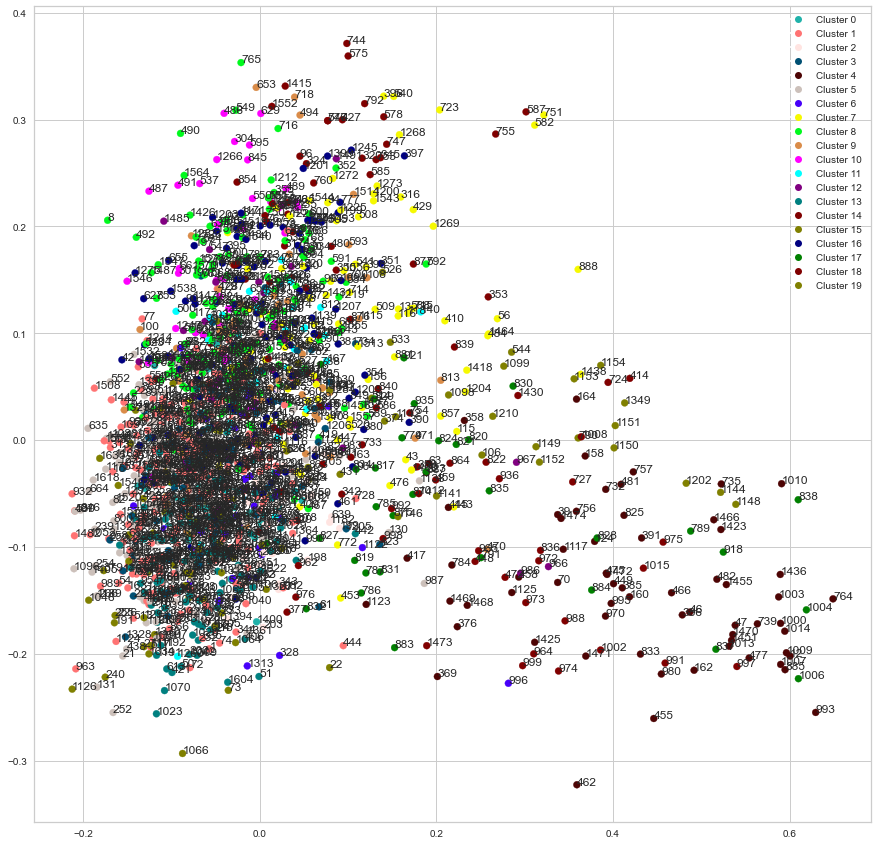

In [55]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from itertools import islice
kmean_indices = model.fit_predict(vectors)
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(vectors.toarray())
x_axis = [i[0] for i in scatter_plot_points]
y_axis = [i[1] for i in scatter_plot_points]
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49',
    10: '#ff00ff', 11: '#00ffff', 12: '#800080', 13: '#008080', 14: '#800000',
    15: '#808000', 16: '#000080', 17: '#008000', 18: '#800000', 19: '#808000',
    20: '#000080', 21: '#008000', 22: '#800000', 23: '#808000', 24: '#000080',
    25: '#008000', 26: '#800000', 27: '#808000', 28: '#000080', 29: '#008000',
    30: '#800000', 31: '#808000', 32: '#000080', 33: '#008000', 34: '#800000',
    35: '#808000', 36: '#000080', 37: '#008000', 38: '#800000', 39: '#808000'
}
colors = [labels_color_map[index] for index in kmean_indices]
fig, ax = plt.subplots(figsize = (15,15))
ax.scatter(x_axis, y_axis, c = colors)
for i in range(len(x_axis)):
    ax.annotate(i, (x_axis[i],y_axis[i]))

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {k}', markerfacecolor=color)
                   for k, color in islice(labels_color_map.items(), true_k)]
ax.legend(handles=legend_elements)

plt.savefig(f'final_pca_{true_k}_clusters')

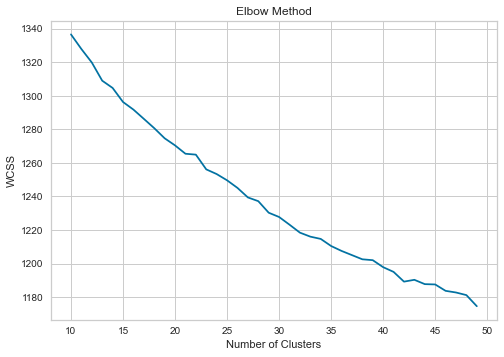

In [56]:
wcss = []
for k in range (10,50):
    k_model = KMeans(n_clusters = k, init = 'k-means++', max_iter = 100, n_init=1, random_state = 1)
    k_model.fit(vectors)
    wcss.append(k_model.inertia_)
plt.plot(range(10,50), wcss)
plt.title("Elbow Method")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

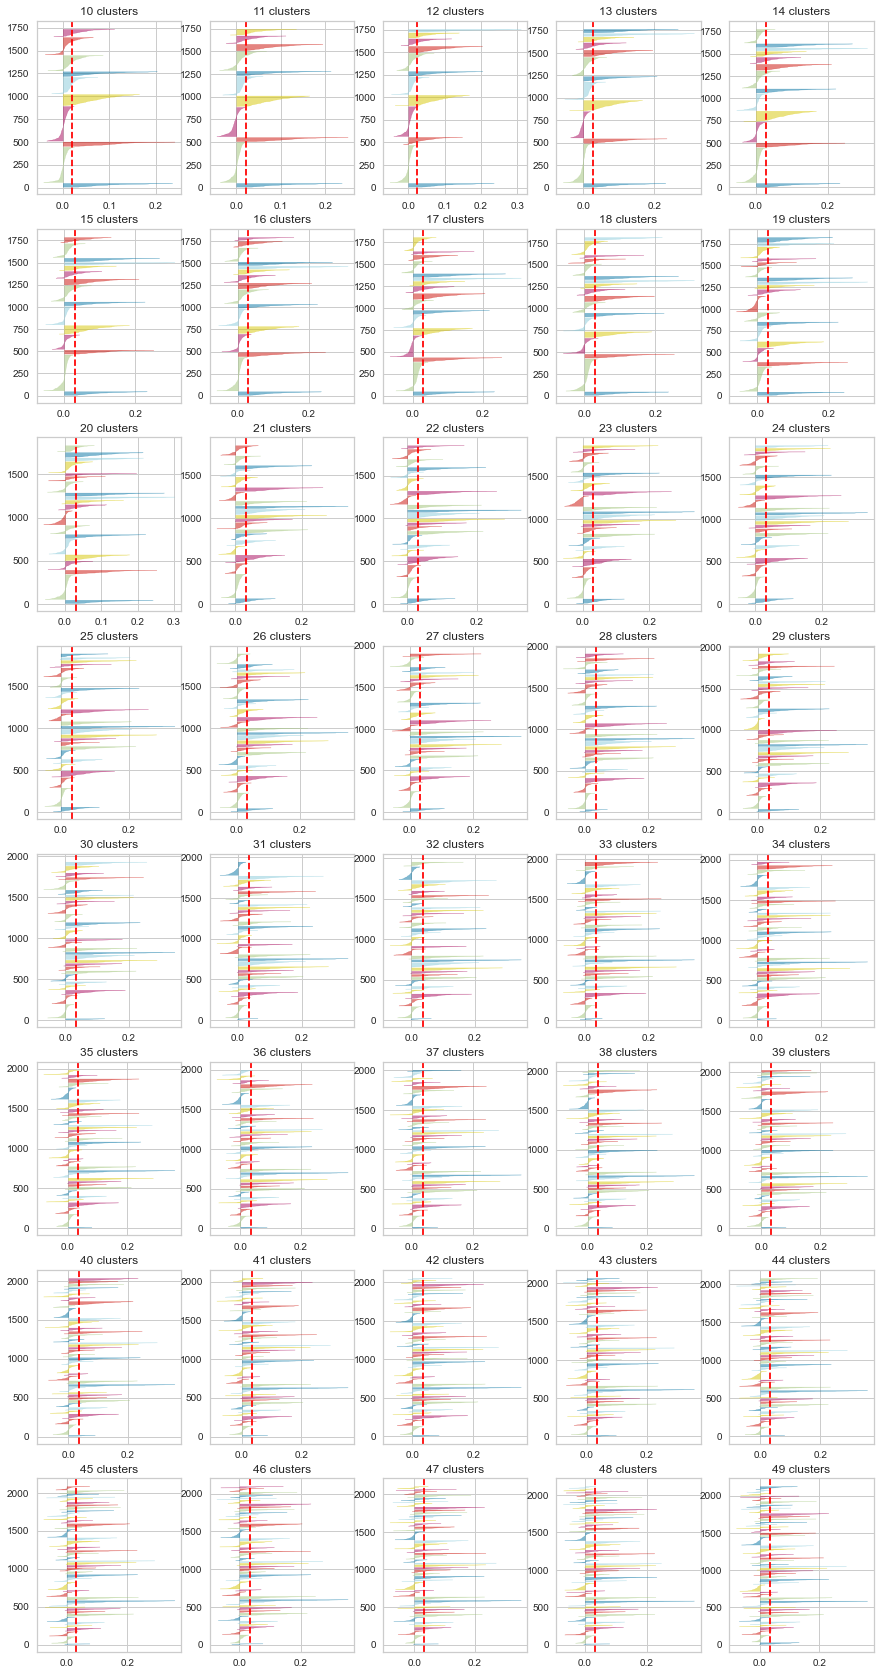

In [58]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(8, 5, figsize=(15, 30), gridspec_kw={'height_ratios': [2, 2, 2, 2, 2, 2, 2, 2]})

for k in range(10,50):
   

    km = KMeans(n_clusters=k, init='k-means++', n_init=1, max_iter=100, random_state =1)
    q, mod = divmod(k-5, 5)
 
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(vectors)
    ax[q-1][mod].set_title(f'{k} clusters')

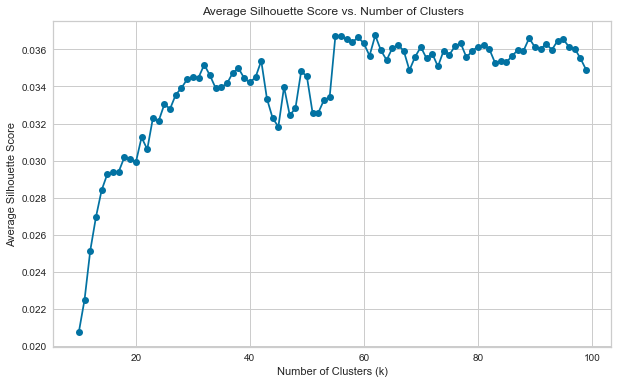

In [59]:
from sklearn.metrics import silhouette_score
clusters_list =[]
silhouette_scores_list = []
for k in range(10,100):
    km = KMeans(n_clusters=k, init='k-means++', n_init=1, max_iter=100, random_state =1)
    cluster_labels = km.fit_predict(vectors)
    avg_silhouette_score = silhouette_score(vectors, cluster_labels)

    clusters_list.append(k)
    silhouette_scores_list.append(avg_silhouette_score)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(clusters_list, silhouette_scores_list, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Average Silhouette Score")
plt.title("Average Silhouette Score vs. Number of Clusters")
plt.grid(True)
plt.show()

In [42]:
def read_list_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        string_list = [line.strip() for line in lines]
    return string_list
file_path = 'cleaned_doc_list_final.txt'
doc_list = read_list_from_file(file_path)

In [43]:
import numpy as np
import json
import glob

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis
import pyLDAvis.gensim

In [44]:
doc_list = [doc.split() for doc in doc_list]

In [46]:
#BIGRAMS AND TRIGRAMS
bigram = gensim.models.Phrases(doc_list, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[doc_list], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

def make_bigrams(doc_list):
    return [bigram_mod[doc] for doc in doc_list]

def make_trigrams(doc_list):
    return [trigram_mod[bigram_mod[doc]] for doc in doc_list]

doc_bigrams = make_bigrams(doc_list)
doc_bigrams_trigrams = make_trigrams(doc_bigrams)

# Words to remove
words_to_remove = ['theyre']

# Remove the words from every list in doc_list
doc_bigrams_trigrams = [[word for word in doc if word not in words_to_remove] for doc in doc_bigrams_trigrams]

doc_bigrams_trigrams[40]

['one',
 'thing',
 'learn',
 'piaget',
 'least',
 'part',
 'idea',
 'equilibrate',
 'state',
 'think',
 'part',
 'biological',
 'basis',
 'idea',
 'moral',
 'progress',
 'something',
 'like',
 'piaget',
 'smart',
 'say',
 'proper',
 'equilibrate',
 'state',
 'one',
 'imagine',
 'family',
 'get',
 'five',
 'people',
 'want',
 'family',
 'whats',
 'good',
 'way',
 'four',
 'member',
 'family',
 'agree',
 'also',
 'facilitate',
 'want',
 'really',
 'tricky',
 'range',
 'way',
 'could',
 'also',
 'see',
 'would',
 'something',
 'would',
 'multiplier',
 'right',
 'everyone',
 'work',
 'voluntarily',
 'towards',
 'common',
 'goal',
 'get',
 'multiplying',
 'effect',
 'might',
 'think',
 'well',
 'family',
 'family',
 'today',
 'next_week',
 'next',
 'month',
 'next',
 'year',
 '10',
 'year',
 'take',
 'timespan',
 'account',
 'family',
 'way',
 'work',
 'well',
 'society',
 'work',
 'well',
 'next_week',
 'next',
 'year',
 'future',
 'iterable']

In [47]:
#TF-IDF REMOVAL
from gensim.models import TfidfModel
id2word = corpora.Dictionary(doc_bigrams_trigrams)

corpus = [id2word.doc2bow(doc) for doc in doc_bigrams_trigrams]

tfidf = TfidfModel(corpus, id2word= id2word)

#Filter low value words and also words missing in tfidf models.

low_value = 0.1

for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = [] #reinitialize to be safe. You can skip this.
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]  

    # reassign        
    corpus[i] = new_bow


In [60]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=30,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=20,
                                           alpha="auto")
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
14     0.275852  0.279497       1        1  7.537177
13     0.183583 -0.274384       2        1  6.466753
29     0.124039 -0.064036       3        1  6.052802
10     0.110207 -0.054080       4        1  5.544269
4      0.069201 -0.029203       5        1  5.334657
9      0.032831 -0.006138       6        1  4.620831
24     0.019841 -0.001538       7        1  4.567531
0      0.039288 -0.024468       8        1  4.424016
20     0.004511  0.001236       9        1  4.411577
2      0.041222 -0.008832      10        1  4.187775
16    -0.003449  0.003066      11        1  4.002603
21    -0.026329  0.006968      12        1  3.877880
22    -0.007552  0.001372      13        1  3.795629
6      0.014866  0.014503      14        1  3.585626
1      0.002525  0.001654      15        1  3.304835
3     -0.032801  0.008000      16        1  3.262621
8     -0.036079  0.008316      17        1  2.643432
19    -0.047723  0.009890      18        1  2.619536
26    -0.046741  0.009746      19        1  2.543172
15    -0.049212  0.010176      20        1  2.541591
27    -0.059292  0.010178      21        1  2.440009
5     -0.052900  0.010482      22        1  2.343815
7     -0.067609  0.011842      23        1  2.246656
11    -0.052163  0.009281      24        1  2.124083
12    -0.056846  0.010793      25        1  1.605488
17    -0.071835  0.011883      26        1  1.482873
18    -0.075430  0.011795      27        1  0.994859
23    -0.077840  0.011391      28        1  0.798433
25    -0.078060  0.011107      29        1  0.607625
28    -0.076107  0.009504      30        1  0.031844, topic_info=         Term        Freq       Total Category  logprob  loglift
405     story  580.000000  580.000000  Default  30.0000  30.0000
451       god  572.000000  572.000000  Default  29.0000  29.0000
1178  problem  413.000000  413.000000  Default  28.0000  28.0000
762     dream  418.000000  418.000000  Default  27.0000  27.0000
85       want  359.000000  359.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
23         go    0.001934    1.671213  Topic30  -9.3398   1.2904
24       good    0.001934  188.167676  Topic30  -9.3398  -3.4334
25     google    0.001934    9.531259  Topic30  -9.3398  -0.4506
26     happen    0.001934  132.409532  Topic30  -9.3398  -3.0819
29       hour    0.001934   45.602533  Topic30  -9.3398  -2.0160

[989 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1140     29  0.676684     2000
2078     23  0.865667       40
991      26  0.594383      400
1666     10  0.966877  abandon
101      22  0.957481     able
...     ...       ...      ...
95        4  0.980004  youtube
990      26  0.801461     ‘hey
1964     16  0.851306      ‘ok
99        5  0.968150    ‘well
161      26  0.714504    ‘yeah

[800 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 14, 30, 11, 5, 10, 25, 1, 21, 3, 17, 22, 23, 7, 2, 4, 9, 20, 27, 16, 28, 6, 8, 12, 13, 18, 19, 24, 26, 29])